In [32]:
import pandas as pd
import numpy as np
import sklearn as sk
df = pd.read_csv("/Users/sofietosti/Desktop/DM Exam/clean_data.csv", sep=',', header=0)

In [33]:
df

,index,date,year,manner_of_death,armed,age,gender,race,city,state,state_ID,signs_of_mental_illness,threat_level,flee,flee_encoded,body_camera,longitude,latitude
0,0,2015-01-02,2015,0,1,53,1,0,Shelton,WA,47,True,attack,Not fleeing,0,False,-123.122,47.247
1,1,2015-01-02,2015,0,1,47,1,5,Aloha,OR,37,False,attack,Not fleeing,0,False,-122.892,45.487
2,2,2015-01-03,2015,1,0,23,1,2,Wichita,KS,16,False,other,Not fleeing,0,False,-97.281,37.695
3,3,2015-01-04,2015,0,1,32,1,5,San Francisco,CA,4,True,attack,Not fleeing,0,False,-122.422,37.763
4,4,2015-01-04,2015,0,1,39,1,2,Evans,CO,5,False,attack,Not fleeing,0,False,-104.692,40.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,5615,2020-09-04,2020,0,1,33,1,1,Syracuse,NY,34,False,other,Not fleeing,0,True,-76.148,43.053
5028,5616,2020-09-04,2020,0,1,38,1,5,Lucerne,CA,4,False,attack,Not fleeing,0,False,-116.832,34.438
5029,5617,2020-09-05,2020,0,1,22,1,5,Battle Creek,MI,22,False,attack,Car,1,False,-85.272,42.305
5030,5618,2020-09-05,2020,0,1,61,1,1,San Antonio,TX,43,False,attack,Not fleeing,0,False,Not fleeing,Not fleeing


In [36]:
density_df = df[['state_ID', 'age']].copy()
density_df.head()

,state_ID,age
0,47,53
1,37,47
2,16,23
3,4,32
4,5,39


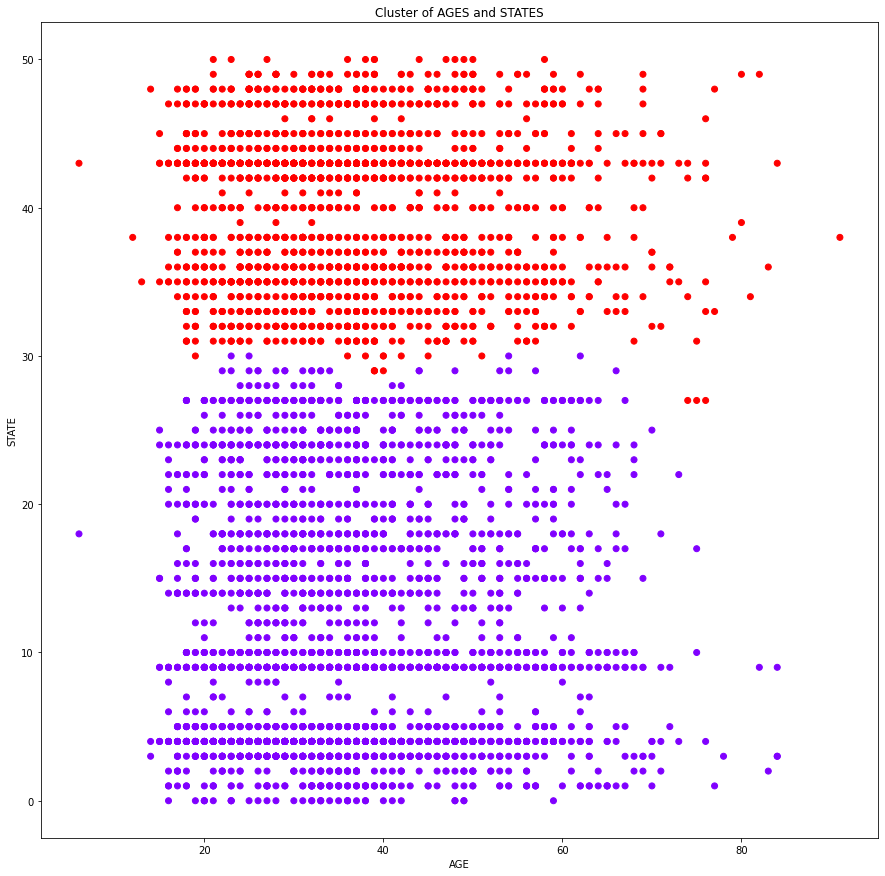

In [40]:
from numpy import unique
from numpy import where
import matplotlib as plt 
from matplotlib.figure import Figure
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import *
import sys
from pylab import *

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(15, 15))
plt.scatter(density_df['age'], density_df['state_ID'], 
           c = ac2.fit_predict(density_df), cmap ='rainbow')

plt.xlabel("AGE")
plt.ylabel("STATE")
plt.title('Cluster of AGES and STATES')

plt.show()

In [27]:
"""
FIND OUT IF THERE IS A CORRELATION BETWEEN THE AGE OF THE DISEASED AND THE STATE OF ORIGIN
"""
state_df = df[['state_ID', 'state']].copy()
state_df = state_df.sort_values(by=['state_ID'])
state_df

val = 0
counter = -1 
stateList = state_df['state'].tolist()
stateDict = {}
tempList = []

for s in stateList:
    if s in tempList:
        "do nothing"
    else:
        counter+=1
        tempList.append(s)
        stateDict[s]=counter
        
stateDict

{'AK': 0,
 'AL': 1,
 'AR': 2,
 'AZ': 3,
 'CA': 4,
 'CO': 5,
 'CT': 6,
 'DC': 7,
 'DE': 8,
 'FL': 9,
 'GA': 10,
 'HI': 11,
 'IA': 12,
 'ID': 13,
 'IL': 14,
 'IN': 15,
 'KS': 16,
 'KY': 17,
 'LA': 18,
 'MA': 19,
 'MD': 20,
 'ME': 21,
 'MI': 22,
 'MN': 23,
 'MO': 24,
 'MS': 25,
 'MT': 26,
 'NC': 27,
 'ND': 28,
 'NE': 29,
 'NH': 30,
 'NJ': 31,
 'NM': 32,
 'NV': 33,
 'NY': 34,
 'OH': 35,
 'OK': 36,
 'OR': 37,
 'PA': 38,
 'RI': 39,
 'SC': 40,
 'SD': 41,
 'TN': 42,
 'TX': 43,
 'UT': 44,
 'VA': 45,
 'VT': 46,
 'WA': 47,
 'WI': 48,
 'WV': 49,
 'WY': 50}

In [28]:
density_df = df[['state_ID', 'age']].copy()
density_df.head()

,state_ID,age
0,47,53
1,37,47
2,16,23
3,4,32
4,5,39


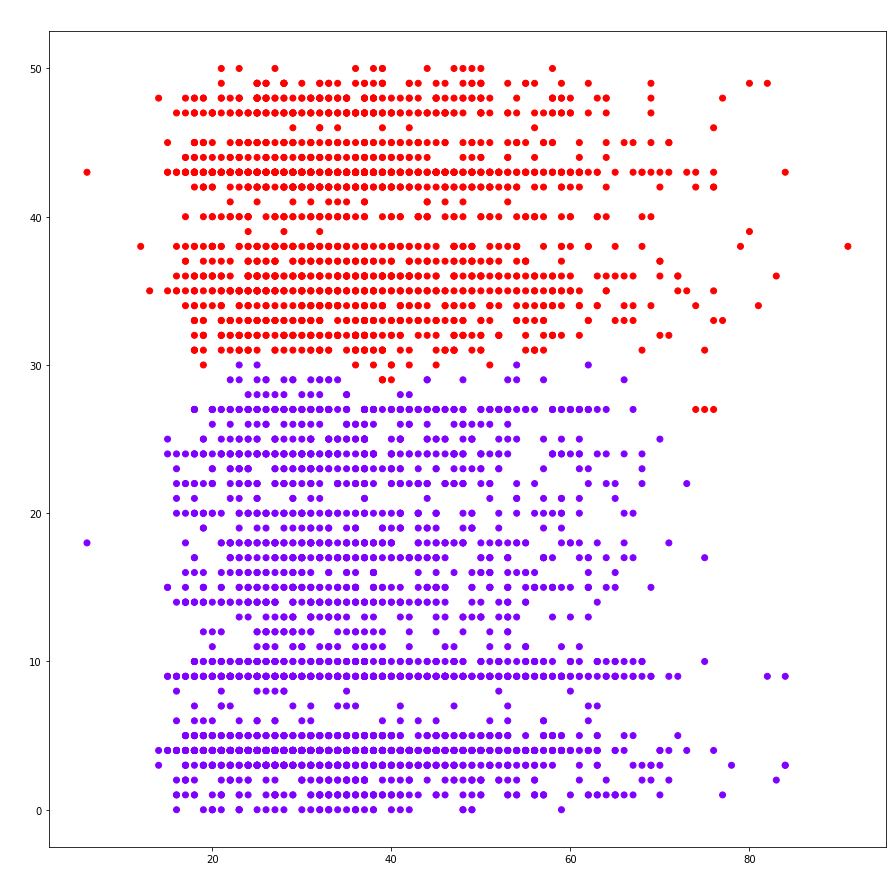

In [10]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(15, 15))
plt.scatter(density_df['age'], density_df['state_ID'], 
           c = ac2.fit_predict(density_df), cmap ='rainbow')

plt.xlabel("AGE", fontsize=18, color='w')
plt.ylabel("STATE", fontsize=18, color='w')
plt.title('Clusters = 2, Age, States', fontsize=25, color='w')

plt.show()

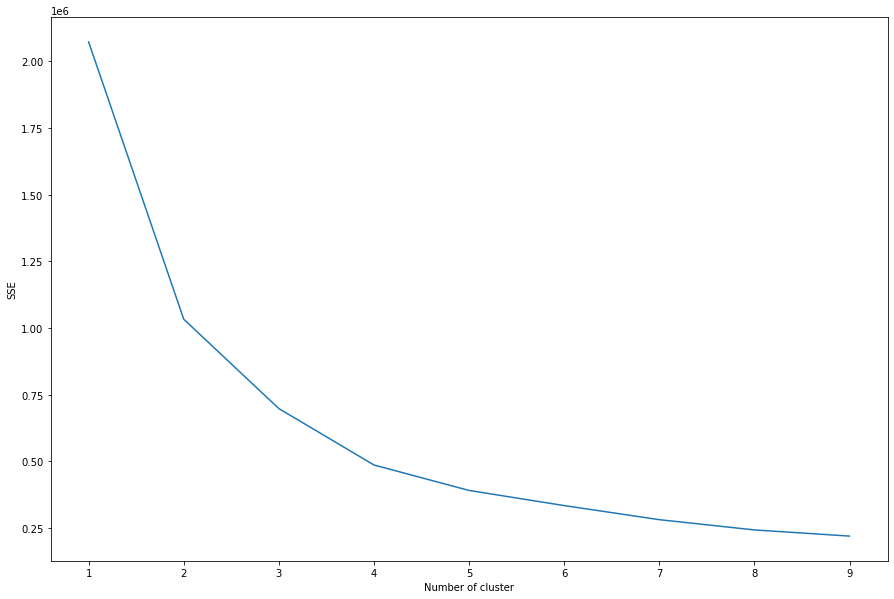

In [11]:
#ELBOE METHOD
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = density_df
#Set my X to be scaled_df and colummns 
data = X[['state_ID', 'age']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.rcParams['figure.figsize'] = [15,10]

In [12]:
density_df.mean()

state_ID    22.253975
age         36.572138
dtype: float64

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
"""
Clustering using K-means 
Purpose: Race density in states in the U.S. 
"""
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(density_df)
 
print(label)

[6 6 5 ... 5 9 8]


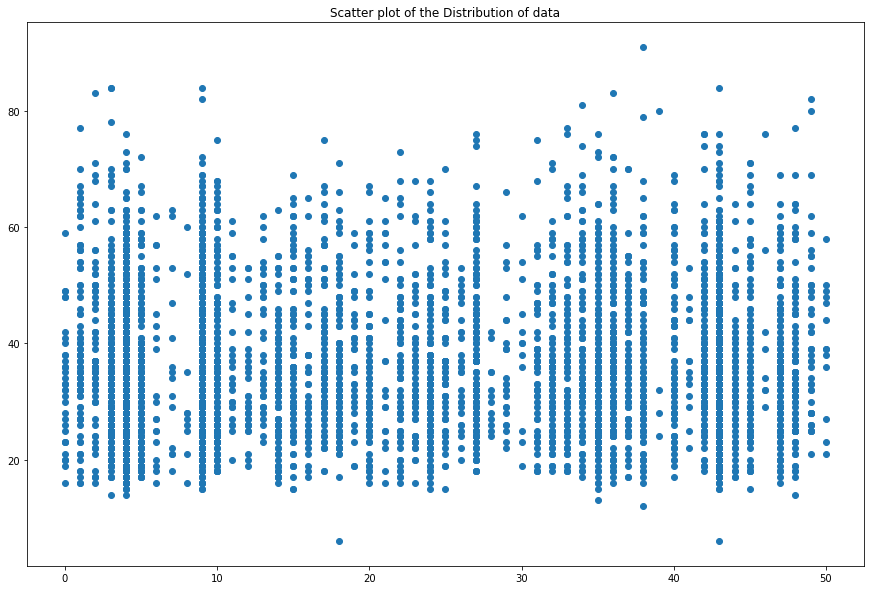

In [14]:
plt.title('Scatter plot of the Distribution of data')
plt.scatter(density_df['state_ID'],density_df['age'])

In [15]:
import random
import pandas as pd
density_df['class'] = 1
#Initialize random means 
IDXmean1 = random.randint(1,len(density_df))
IDXmean2 = random.randint(1,len(density_df))

mean1 = density_df.iloc[IDXmean1]
mean2 = density_df.iloc[IDXmean2]

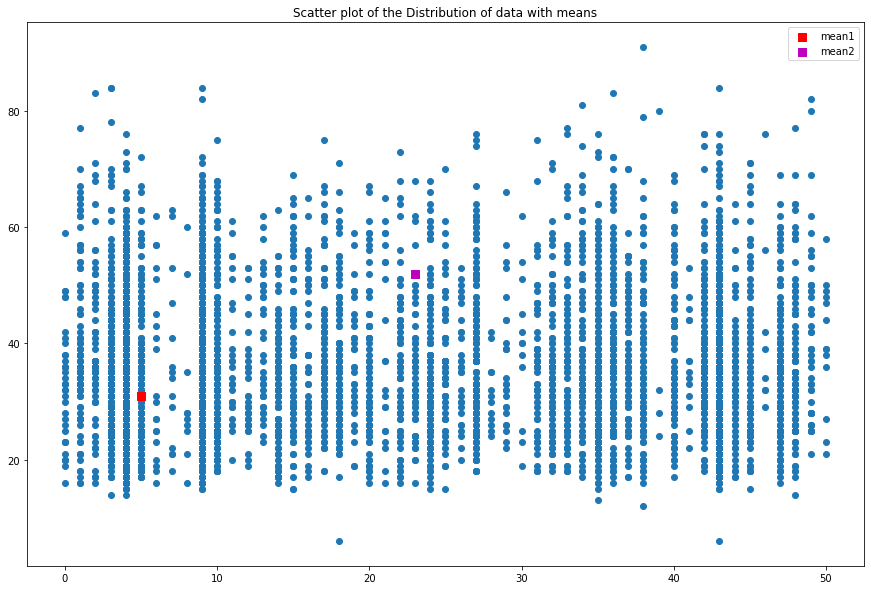

In [16]:
#plot initial data points and means 
plt.title('Scatter plot of the Distribution of data with means')
plt.scatter(density_df['state_ID'],density_df['age'])
plt.scatter(mean1['state_ID'],mean1['age'],color='r',s=50,label='mean1',marker='s')
plt.scatter(mean2['state_ID'],mean2['age'],color='m',s=50,label='mean2',marker='s')
plt.legend()

In [17]:
def initializeMeans(df):
    #Take two random points as the means and initialize 
    IDXmean1 = random.randint(1,len(df))
    IDXmean2 = random.randint(1,len(df))
    mean1 = df.iloc[IDXmean1]
    mean2 = df.iloc[IDXmean2]
    
    return mean1,mean2

In [18]:
def euclideanDist(df,pointIDX,mean1,mean2):
    #find the index of the point you want to compute the distance 
    #calculate euclidean distance to means
    #the datafram that has the closest mean is assigned class = 1 
    point = df.iloc[pointIDX][['state_ID','age']].values
    mean1 = mean1[['state_ID','age']].values
    mean2 = mean2[['state_ID','age']].values
    
    distTo1 = sum([a-b for a,b in zip(point,mean1)])**2 # np.linalg.norm()
    distTo2 = sum([a-b for a,b in zip(point,mean2)])**2
        
    if distTo1 < distTo2:
        df.loc[pointIDX,'class'] = 1
    else:
        df.loc[pointIDX,'class'] = 2
    
    return df

In [19]:
def updateMean(df):
    dfClass1 = df.loc[df['class'] == 1]
    dfClass2 = df.loc[df['class'] == 2]
    mean1 = dfClass1[['state_ID','age']].mean()
    mean2 = dfClass2[['state_ID','age']].mean()
    
    return mean1,mean2

In [20]:
def Kmeans(df,iterations):
    
    df['class'] = 1
    prevPredictedClasses = list() # Initialize a container for predicted classes for early stopping
    mean1,mean2 = initializeMeans(df)
        
    plt.title('Init')

    plt.scatter(df.loc[df['class'] == 1]['state_ID'],df.loc[df['class'] == 1]['age'],color='g',label='1')
    plt.scatter(df.loc[df['class'] == 2]['state_ID'],df.loc[df['class'] == 2]['age'],color='b',label='2')

    plt.scatter(mean1['state_ID'],mean1['age'],s=70,label='mean1',marker='s',color='r')
    plt.scatter(mean2['state_ID'],mean2['age'],s=70,label='mean2',marker='s',color='y')
    
    plt.legend()
    plt.show()
    
    c = 1 # Counter for plotting
    while prevPredictedClasses != list(df['class'].values):
        prevPredictedClasses = list(df['class'].values)
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2)
            
        mean1,mean2 = updateMean(df)
        
        plt.title('Iteration = {}'.format(c))
        
        plt.scatter(df.loc[df['class'] == 1]['state_ID'],df.loc[df['class'] == 1]['age'],color='g',label='1')
        plt.scatter(df.loc[df['class'] == 2]['state_ID'],df.loc[df['class'] == 2]['age'],color='b',label='2')
        
        plt.scatter(mean1['state_ID'],mean1['age'],s=70,label='mean1',marker='s',color='r')
        plt.scatter(mean2['state_ID'],mean2['age'],s=70,label='mean2',marker='s',color='y')
        
        plt.legend()
        plt.show()
        
        c += 1 # increment count
    
    return df,mean1,mean2

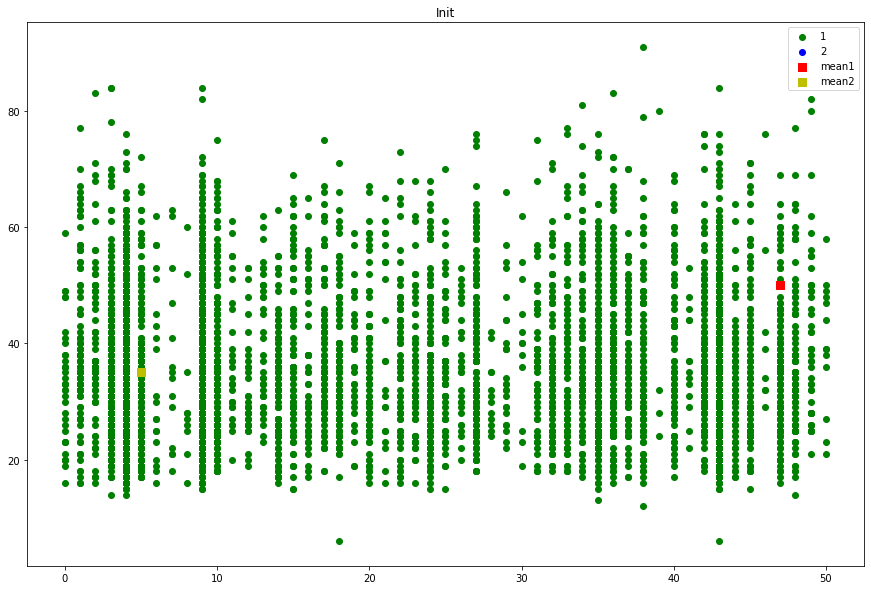

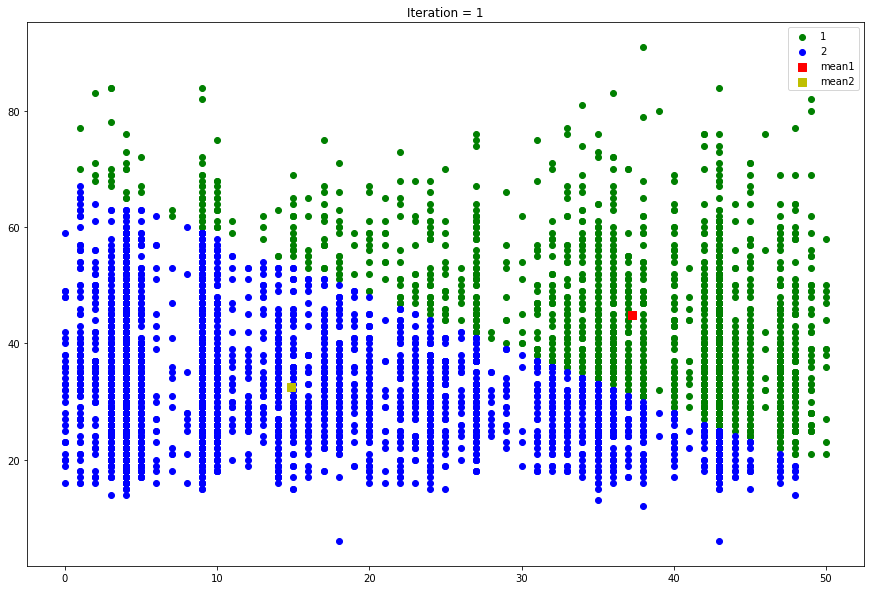

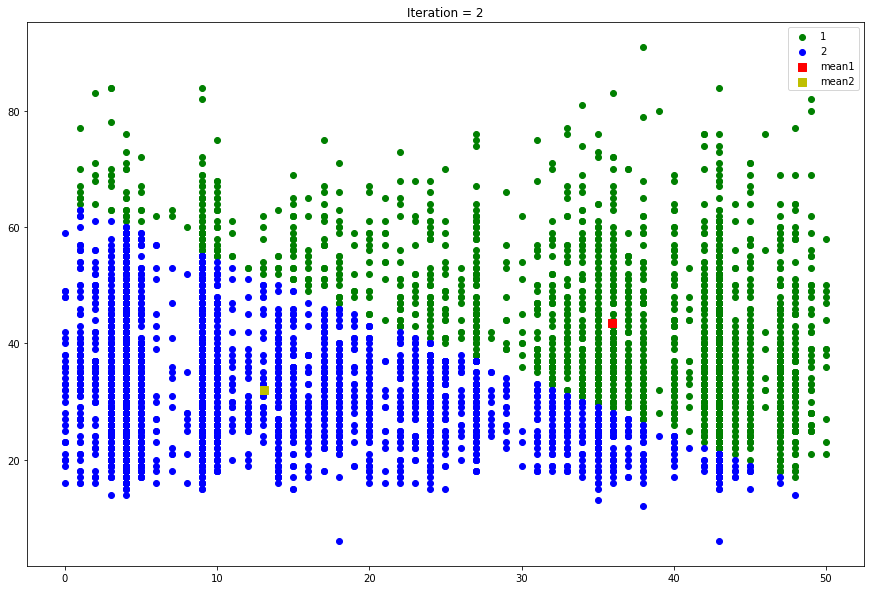

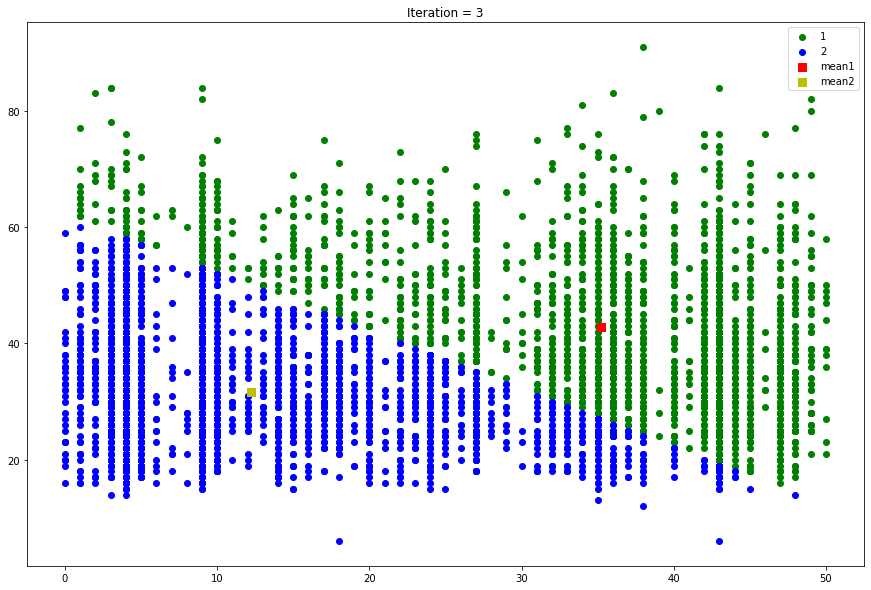

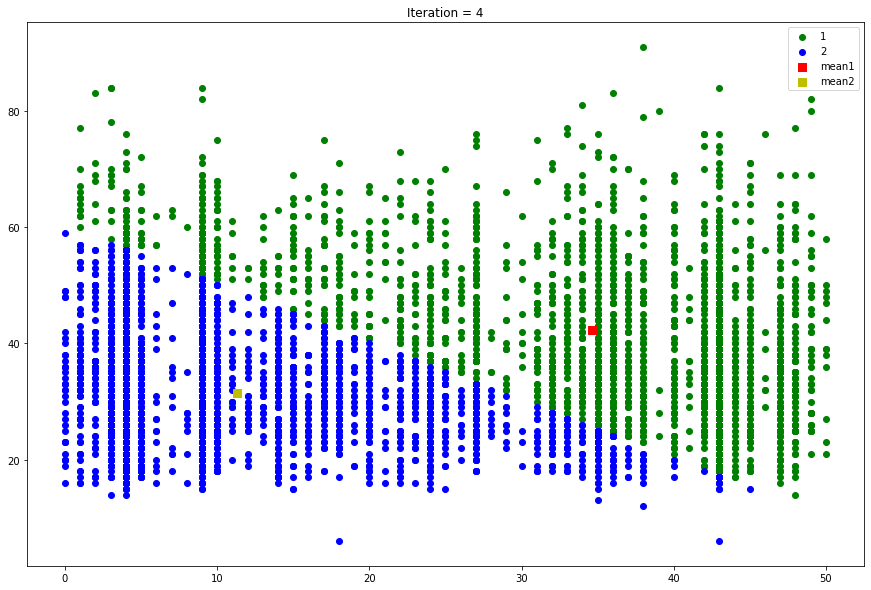

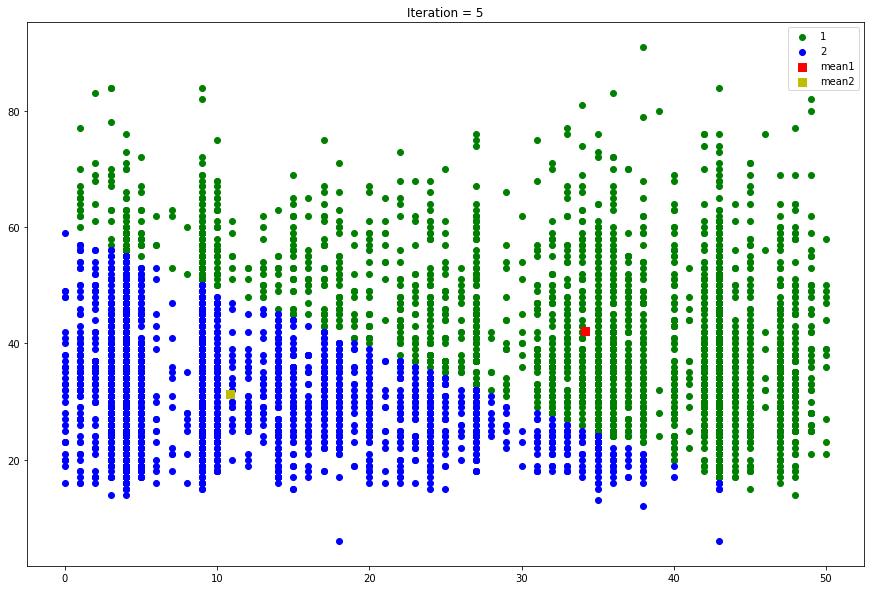

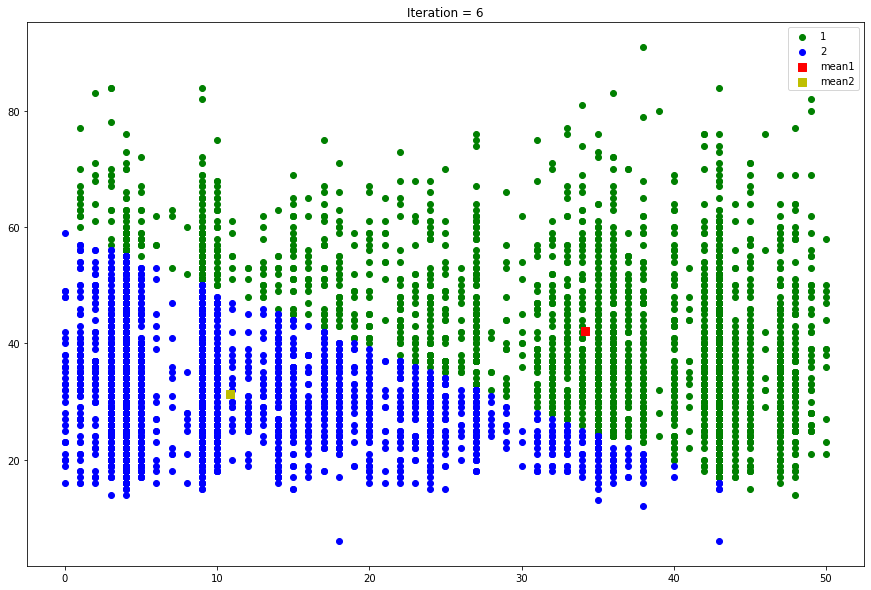

In [21]:
df = Kmeans(density_df,6)
plt.rcParams['figure.figsize'] = [8,8]

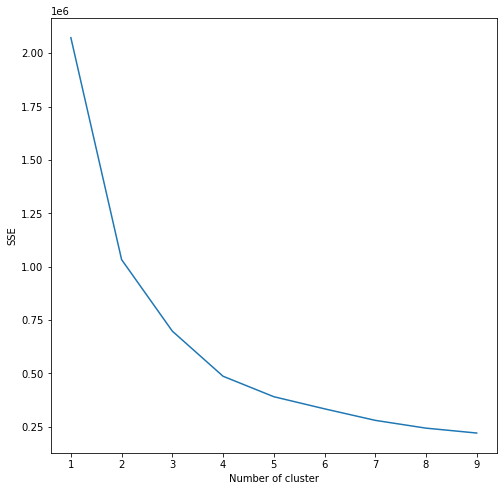

In [22]:
#ELBOE METHOD
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = density_df
#Set my X to be scaled_df and colummns 
data = X[['state_ID', 'age']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.rcParams['figure.figsize'] = [15,10]